# Libraries import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Descriptors
import rdkit
from rdkit.Chem import QED
import warnings
warnings.filterwarnings('ignore')

# Data loading

In [2]:
kinaz_mol = pd.read_excel('Molecules_generated_tensor_scaling_0_1.xlsx')

In [3]:
kinaz_mol.shape

(55, 2)

In [4]:
smiles = kinaz_mol['SMILES_From_Tensor_rotation']
smiles.head()

0          CCC(=O)NCC1=CN(C2=NC=NC(C#N)=C2C)C1SOC
1    CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2
2        CCC(=O)NCC=1C=NC=C(S(=O)(=O)C(C)CC#N)N=1
3        CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12
4       CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C
Name: SMILES_From_Tensor_rotation, dtype: object

In [5]:
new_set0 = kinaz_mol['SMILES_From_Tensor_rotation'].to_list()

In [6]:
dff_15 = pd.DataFrame(new_set0,columns=['SMILES'])
dff_15.shape

(55, 1)

# Duplicates deletion

In [7]:
dff_17 = dff_15.drop_duplicates()
dff_17.shape

(55, 1)

In [8]:
new_set1 = dff_17['SMILES'].to_list()
new_set1[0]

'CCC(=O)NCC1=CN(C2=NC=NC(C#N)=C2C)C1SOC'

# Seeing of the first structure

In [9]:
structure =  Chem.MolFromSmiles(new_set1[2])

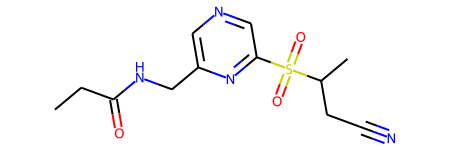

In [10]:
structure

# Calculation of the QED descriptors

In [11]:
QED_list = []
for smiles in new_set1:
    QED_list.append(QED.properties(Chem.MolFromSmiles(smiles)))

In [12]:
QED_list[0]

QEDproperties(MW=319.39000000000004, ALOGP=1.5074999999999998, HBA=7, HBD=1, PSA=91.14, ROTB=6, AROM=1, ALERTS=1)

# Preparation of the generated QED descriptors to the dataframe

In [13]:
df = pd.DataFrame.from_records(QED_list, columns = ['Molecular weight', 'alogP', 'HBacceptors','HBdonors',
                                                    'Polar surface area','rotatable bonds','aromatics rings','alerts'])

In [14]:
df.head()

,Molecular weight,alogP,HBacceptors,HBdonors,Polar surface area,rotatable bonds,aromatics rings,alerts
0,319.390,1.50750,7,1,91.14,6,1,1
1,335.408,1.83410,4,4,70.98,5,2,1
2,296.352,0.57868,6,1,112.81,6,1,0
3,289.360,1.09228,4,0,74.06,3,1,0
4,301.375,2.10890,4,1,74.81,2,2,1


# the histogram of the molecular weight distribution

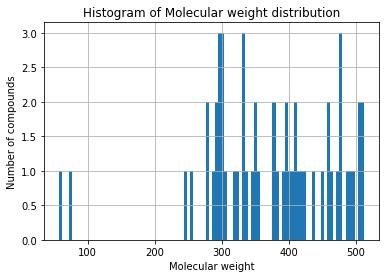

count     55.000000
mean     371.613727
std       97.109753
min       58.040000
25%      301.406000
50%      377.529000
75%      455.013500
max      511.666000
Name: Molecular weight, dtype: float64
Kurtosis:
1.728
Skewness:
-0.9034


In [15]:
plt.hist(df['Molecular weight'],bins=100)
plt.xlabel('Molecular weight')
plt.ylabel('Number of compounds')
plt.title('Histogram of Molecular weight distribution')
plt.grid(True)
plt.show()

print(df['Molecular weight'].describe())
print('Kurtosis:')
print(round(df['Molecular weight'].kurtosis(),4))
print('Skewness:')
print(round(df['Molecular weight'].skew(),4))

# the histogram of the octanol-water partition coefficient distribution

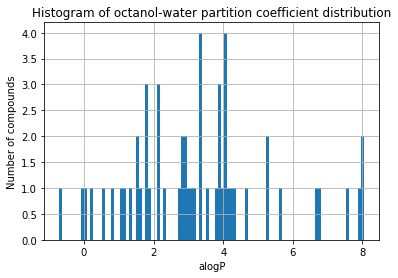

count    55.000000
mean      3.266390
std       2.053703
min      -0.706200
25%       1.797850
50%       3.164600
75%       4.052760
max       8.038000
Name: alogP, dtype: float64
Kurtosis:
0.2507
Skewness:
0.5714


In [16]:
plt.hist(df['alogP'],bins=100)
plt.xlabel('alogP')
plt.ylabel('Number of compounds')
plt.title('Histogram of octanol-water partition coefficient distribution')
plt.grid(True)
plt.show()

print(df['alogP'].describe())
print('Kurtosis:')
print(round(df['alogP'].kurtosis(),4))
print('Skewness:')
print(round(df['alogP'].skew(),4))

# the histogram of the hydrogen bonding acceptors number distribution

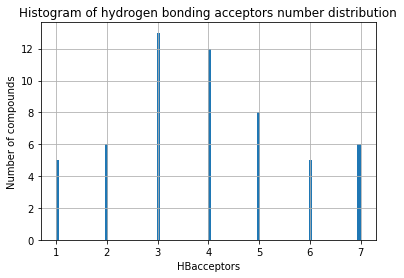

count    55.000000
mean      3.927273
std       1.741163
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       7.000000
Name: HBacceptors, dtype: float64
Kurtosis:
-0.7034
Skewness:
0.1811


In [17]:
plt.hist(df['HBacceptors'],bins=100)
plt.xlabel('HBacceptors')
plt.ylabel('Number of compounds')
plt.title('Histogram of hydrogen bonding acceptors number distribution')
plt.grid(True)
plt.show()

print(df['HBacceptors'].describe())
print('Kurtosis:')
print(round(df['HBacceptors'].kurtosis(),4))
print('Skewness:')
print(round(df['HBacceptors'].skew(),4))

# the histogram of the hydrogen bonding donors number distribution

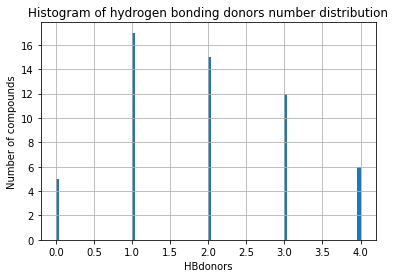

count    55.000000
mean      1.945455
std       1.161388
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: HBdonors, dtype: float64
Kurtosis:
-0.8199
Skewness:
0.1831


In [18]:
plt.hist(df['HBdonors'],bins=100)
plt.xlabel('HBdonors')
plt.ylabel('Number of compounds')
plt.title('Histogram of hydrogen bonding donors number distribution')
plt.grid(True)
plt.show()

print(df['HBdonors'].describe())
print('Kurtosis:')
print(round(df['HBdonors'].kurtosis(),4))
print('Skewness:')
print(round(df['HBdonors'].skew(),4))

# the histogram of the polar surface area distribution

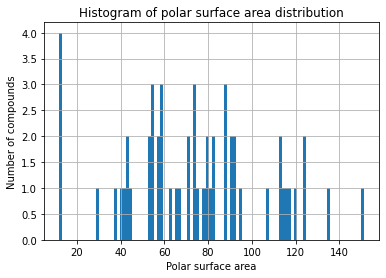

count     55.000000
mean      73.939818
std       32.081079
min       12.030000
25%       54.405000
50%       73.800000
75%       91.270000
max      151.190000
Name: Polar surface area, dtype: float64
Kurtosis:
-0.2077
Skewness:
0.0958


In [19]:
plt.hist(df['Polar surface area'],bins=100)
plt.xlabel('Polar surface area')
plt.ylabel('Number of compounds')
plt.title('Histogram of polar surface area distribution')
plt.grid(True)
plt.show()

print(df['Polar surface area'].describe())
print('Kurtosis:')
print(round(df['Polar surface area'].kurtosis(),4))
print('Skewness:')
print(round(df['Polar surface area'].skew(),4))

# the histogram of the rotatable bonds number distribution

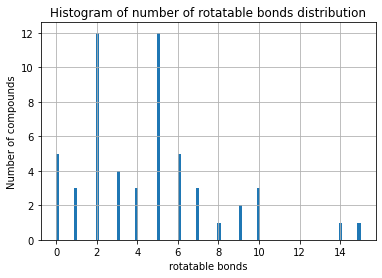

count    55.000000
mean      4.490909
std       3.332626
min       0.000000
25%       2.000000
50%       5.000000
75%       6.000000
max      15.000000
Name: rotatable bonds, dtype: float64
Kurtosis:
1.3931
Skewness:
1.0567


In [20]:
plt.hist(df['rotatable bonds'],bins=100)
plt.xlabel('rotatable bonds')
plt.ylabel('Number of compounds')
plt.title('Histogram of number of rotatable bonds distribution')
plt.grid(True)
plt.show()

print(df['rotatable bonds'].describe())
print('Kurtosis:')
print(round(df['rotatable bonds'].kurtosis(),4))
print('Skewness:')
print(round(df['rotatable bonds'].skew(),4))

# the histogram of the aromatics rings number distribution

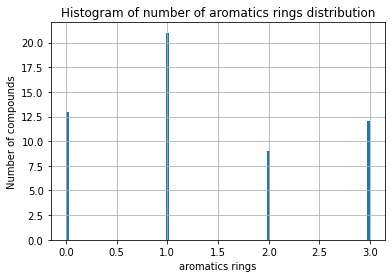

count    55.000000
mean      1.363636
std       1.077783
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: aromatics rings, dtype: float64
Kurtosis:
-1.1368
Skewness:
0.3212


In [21]:
plt.hist(df['aromatics rings'],bins=100)
plt.xlabel('aromatics rings')
plt.ylabel('Number of compounds')
plt.title('Histogram of number of aromatics rings distribution')
plt.grid(True)
plt.show()

print(df['aromatics rings'].describe())
print('Kurtosis:')
print(round(df['aromatics rings'].kurtosis(),4))
print('Skewness:')
print(round(df['aromatics rings'].skew(),4))

# QED descriptor

Drug-Like (QED):

    - mass < 400
    
    - ring count > 0
    
    - rotatable bond count < 5
    
    - h-bond donor count <= 5
    
    - h-bond acceptor count <= 10
    
    - logP < 5
    
QED is calculated from weighted sum of ADS of mapped properties:
WEIGHT_MEAN = QEDproperties( MW = 0.66, ALOGP = 0.46, HBA = 0.05, HBD = 0.61, PSA = 0.06, ROTB = 0.65, AROM = 0.48, ALERTS = 0.95 )

https://github.com/kevinid/molecule_generator/blob/master/rdkit_contrib/qed.py
Function is described here...


In [22]:
QED_list_QED = []
for smiles in new_set1:
    QED_list_QED.append(QED.qed(Chem.MolFromSmiles(smiles)))

In [23]:
QED_list_QED[0]

0.794550823410563

In [24]:
df_QED = pd.DataFrame(QED_list_QED, columns = ['Quantitative Estimation of Drug-likeness'])

In [25]:
df_QED.head()

,Quantitative Estimation of Drug-likeness
0,0.794551
1,0.629409
2,0.821122
3,0.834638
4,0.862074


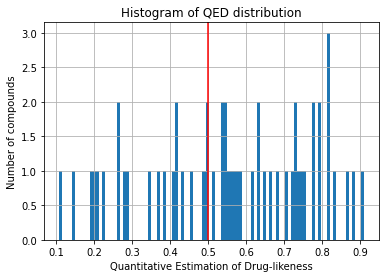

count    55.000000
mean      0.554114
std       0.213606
min       0.108864
25%       0.410339
50%       0.563766
75%       0.732084
max       0.909168
Name: Quantitative Estimation of Drug-likeness, dtype: float64
Kurtosis:
-0.8787
Skewness:
-0.3196


In [26]:
plt.hist(df_QED['Quantitative Estimation of Drug-likeness'],bins=100)
plt.xlabel('Quantitative Estimation of Drug-likeness')
plt.ylabel('Number of compounds')
plt.title('Histogram of QED distribution')
plt.axvline(x=0.5, color='r')
plt.grid(True)
plt.show()

print(df_QED['Quantitative Estimation of Drug-likeness'].describe())
print('Kurtosis:')
print(round(df_QED['Quantitative Estimation of Drug-likeness'].kurtosis(),4))
print('Skewness:')
print(round(df_QED['Quantitative Estimation of Drug-likeness'].skew(),4))

# Combination of SMILES with QED value

In [27]:
dff_15['QED'] = QED_list_QED

In [28]:
dff_15.head()

,SMILES,QED
0,CCC(=O)NCC1=CN(C2=NC=NC(C#N)=C2C)C1SOC,0.794551
1,CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2,0.629409
2,CCC(=O)NCC=1C=NC=C(S(=O)(=O)C(C)CC#N)N=1,0.821122
3,CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12,0.834638
4,CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C,0.862074


In [29]:
df_QED_above_0_6 = dff_15.loc[dff_15['QED'] > 0.5] #0.6

In [30]:
len(df_QED_above_0_6['QED'])

34

# Lipinski's rule of 5

Lipinski:

    - Moleculer Weight <= 500
    
    - LogP <= 5
    
    - H-Bond Donor Count <= 5
    
    - H-Bond Acceptor Count <= 10
    
    - Rotatable bonds <= 5

In [31]:
dff_15['molecular_weight'] = [Descriptors.ExactMolWt(Chem.MolFromSmiles(molecule)) for molecule in dff_15['SMILES']]
dff_15['logp'] = [Descriptors.MolLogP(Chem.MolFromSmiles(molecule)) for molecule in dff_15['SMILES']]
dff_15['h_bond_donors'] = [Descriptors.NumHDonors(Chem.MolFromSmiles(molecule)) for molecule in dff_15['SMILES']]
dff_15['h_bond_acceptors'] = [Descriptors.NumHAcceptors(Chem.MolFromSmiles(molecule)) for molecule in dff_15['SMILES']]
dff_15['rotatable_bonds'] = [Descriptors.NumRotatableBonds(Chem.MolFromSmiles(molecule)) for molecule in dff_15['SMILES']]

In [32]:
dff_15.head()

,SMILES,QED,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds
0,CCC(=O)NCC1=CN(C2=NC=NC(C#N)=C2C)C1SOC,0.794551,319.110296,1.50750,1,7,6
1,CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2,0.629409,335.121609,1.83410,4,5,5
2,CCC(=O)NCC=1C=NC=C(S(=O)(=O)C(C)CC#N)N=1,0.821122,296.094311,0.57868,1,6,6
3,CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12,0.834638,289.088498,1.09228,0,4,3
4,CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C,0.862074,301.099731,2.10890,1,5,2


In [33]:
# Lipinski
dff_15['Lipinski Rule of 5'] = 0
for element in range(len(dff_15)):
    
    if dff_15['molecular_weight'][element] <= 500 and dff_15['logp'][element] <= 5 and dff_15['h_bond_donors'][element] <= 5 and dff_15['h_bond_acceptors'][element] <= 10 and dff_15['rotatable_bonds'][element] <= 5:
        lipinski = True
        dff_15["Lipinski Rule of 5"][element] = 1
    else:
        dff_15["Lipinski Rule of 5"][element] = 0

In [34]:
dff_15.head()

,SMILES,QED,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Lipinski Rule of 5
0,CCC(=O)NCC1=CN(C2=NC=NC(C#N)=C2C)C1SOC,0.794551,319.110296,1.50750,1,7,6,0
1,CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2,0.629409,335.121609,1.83410,4,5,5,1
2,CCC(=O)NCC=1C=NC=C(S(=O)(=O)C(C)CC#N)N=1,0.821122,296.094311,0.57868,1,6,6,0
3,CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12,0.834638,289.088498,1.09228,0,4,3,1
4,CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C,0.862074,301.099731,2.10890,1,5,2,1


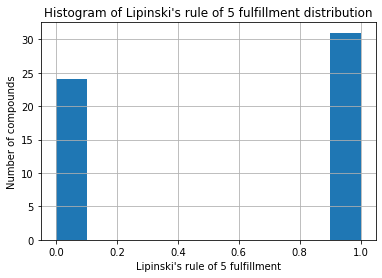

count    55.000000
mean      0.563636
std       0.500505
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Lipinski Rule of 5, dtype: float64
Kurtosis:
-2.0047
Skewness:
-0.2639


In [35]:
plt.hist(dff_15['Lipinski Rule of 5'],bins=10)
plt.xlabel("Lipinski's rule of 5 fulfillment")
plt.ylabel('Number of compounds')
plt.title("Histogram of Lipinski's rule of 5 fulfillment distribution")
plt.grid(True)
plt.show()

print(dff_15['Lipinski Rule of 5'].describe())
print('Kurtosis:')
print(round(dff_15['Lipinski Rule of 5'].kurtosis(),4))
print('Skewness:')
print(round(dff_15['Lipinski Rule of 5'].skew(),4))

In [36]:
print("Number of structures that do not fulfilled Lipinski's rule of 5 is: "+str(len(dff_15[dff_15['Lipinski Rule of 5'] ==0])))

Number of structures that do not fulfilled Lipinski's rule of 5 is: 24


In [37]:
print("Number of structures that fulfilled Lipinski's rule of 5 is: "+str(len(dff_15[dff_15['Lipinski Rule of 5'] ==1])))

Number of structures that fulfilled Lipinski's rule of 5 is: 31


In [38]:
to_excel = dff_15[(dff_15['QED'] > 0.5) & (dff_15['Lipinski Rule of 5'] == 1)] #0.6
to_excel = to_excel.reset_index()
QED_list = [QED.properties(Chem.MolFromSmiles(smiles)) for smiles in to_excel['SMILES']]
df = pd.DataFrame.from_records(QED_list, columns = ['Molecular weight', 'alogP', 'HBacceptors','HBdonors',
                                                    'Polar surface area','rotatable bonds','aromatics rings','alerts'])
to_excel = to_excel.reset_index()
to_excel['Polar surface area'] = df['Polar surface area']
to_excel['aromatics rings'] = df['aromatics rings']
to_excel['Lipinski alerts - to QED calc'] = df['alerts']

In [39]:
column_order = ['SMILES', 'molecular_weight', 'logp', 'h_bond_donors', 'h_bond_acceptors', 'rotatable_bonds', 'Polar surface area', 'aromatics rings', 'Lipinski alerts - to QED calc', 'Lipinski Rule of 5', 'QED']

In [40]:
to_excel = to_excel[column_order]

In [41]:
to_excel.head()

,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED
0,CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2,335.121609,1.83410,4,5,5,70.98,2,1,1,0.629409
1,CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12,289.088498,1.09228,0,4,3,74.06,1,0,1,0.834638
2,CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C,301.099731,2.10890,1,5,2,74.81,2,1,1,0.862074
3,CCC(=O)NCC(C1)=NN=C(C2=CC=C(C)C(CF)=C2)S1,307.115461,2.84012,1,4,5,53.82,1,0,1,0.909168
4,CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C,346.126360,2.83200,2,4,5,58.95,2,1,1,0.818708


In [42]:
print("Number of structures that fulfilled QED threshold and Lipinski's rule of 5 is: "+str(len(to_excel)))

Number of structures that fulfilled QED threshold and Lipinski's rule of 5 is: 26


## Percentage of structures that fulfilled given restrictions from all generated using method given in file title

In [43]:
print("Percentage of molecules that fulfilled restrictions: "+str((round(len(to_excel)*100/len(dff_15),2)))+'%.')

Percentage of molecules that fulfilled restrictions: 47.27%.


In [44]:
to_excel.to_excel('Selected_molecules_from_0_1_tensor_scaling.xlsx')